# Отток клиентов банка

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общие-сведения-о-полученных-данных." data-toc-modified-id="Общие-сведения-о-полученных-данных.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общие сведения о полученных данных.</a></span></li><li><span><a href="#Распределение-клиентов-по-разным-параметрам." data-toc-modified-id="Распределение-клиентов-по-разным-параметрам.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Распределение клиентов по разным параметрам.</a></span></li><li><span><a href="#Преобразование-данных." data-toc-modified-id="Преобразование-данных.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Преобразование данных.</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес-решающих-деревьев" data-toc-modified-id="Случайный-лес-решающих-деревьев-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес решающих деревьев</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вес-класса." data-toc-modified-id="Вес-класса.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вес класса.</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

<h1>Описание проекта</h1>
От маркетологов «Бета-Банка» поступило техническое задание на исследование оттока клиентов для сохранения текущих клиенотв.

По заданию требуется спрогнозировать, уйдёт клиент из банка в ближайшее время или нет на основании исторических данных о поведении клиентов и расторжении договоров с банком. Необходимо построить модель с предельно большим значением *F1*-меры( не менее 0.59).

Дополнительно рассмотреть *AUC-ROC* и *Recall*.

Ход проведения исследования:
1. Изучение пердоставленных данных и подготовка к дальнейшим исследованиям.
3. Сравнение разных моделей в зависимости от гиперпараметров.
4. Проверка качества выбранной модели.
5. Проверка модели на вменяемость.

## Подготовка данных

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from joblib import dump
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn. metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

In [2]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

### Общие сведения о полученных данных.

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В нашем распоряжении таблица из 10 тысяч строк со следующимим данными:
- личные данные(уникальный индификатор, фамилия, страна проживания, пол и возраст)
- финансовые данные(кредитный рейтинг, продолжительность работы с банком, баланс на счете, количество используемых продуктов, наличие кредитной карты и активности и предполагаемый доход)

В столбце со значением продолжительности работы с банком есть пропущенные данные. Это может быть связано как с тем, что клиент с банком меньше года, так и с ошибками выгрузки данных. Так как пропусков 9,1%(909 строк), рассмотрим, нет ли закономерности.

In [5]:
#вывод уникальных значений столбца
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [6]:
data[data['Tenure'].isnull()].head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


Предположение, что пропуски связаны со сроком использования банка меньше года, не подтвердилось, и не обнаружено очевидной взаимосвязи пропусков. Значит, мы не можем заменить данные пропуски на 0, также удаление данных строк может повлиять на качество работы модели. 


В дальнейшем исследовании нам не так важны уникальные данные пользователя, как личный идентификатор и фамилия, так как маловероятно, что уходят пользователи с определенной буквой или цифрой в них. Поэтому приведем таблицу к обезличенным данным.

In [7]:
data_anonym = data.drop(columns = ['RowNumber','CustomerId', 'Surname'],
                        axis = 1)

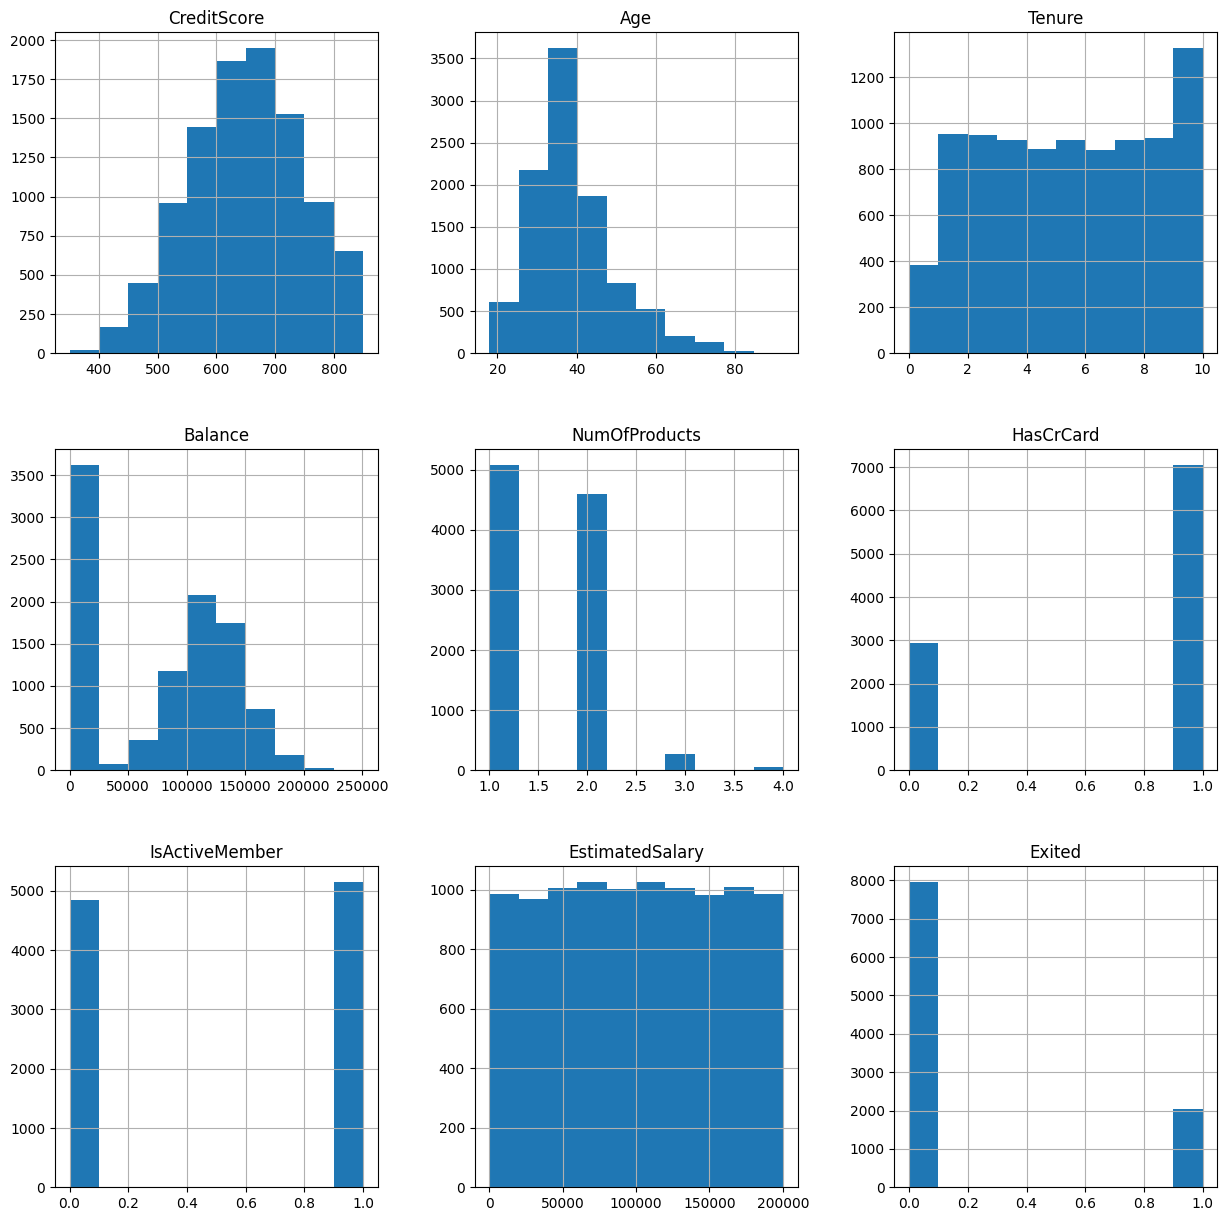

In [8]:
data_anonym.hist(figsize=(15, 15))
plt.show()

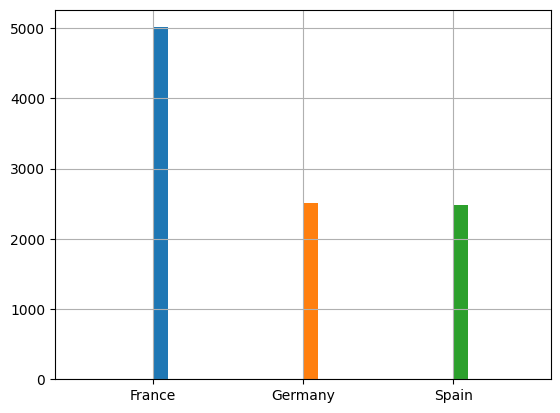

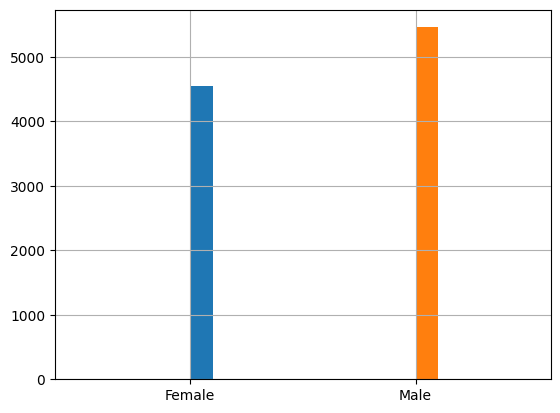

In [9]:
for param in ['Geography', 'Gender']:
    data_anonym.groupby(param)[param].hist()
    plt.show()

На гистограмме не видно явных аномалий значей, рассмотрим подробнее столбцы кредитный рейтинг, возраст и количество использованных продуктов.

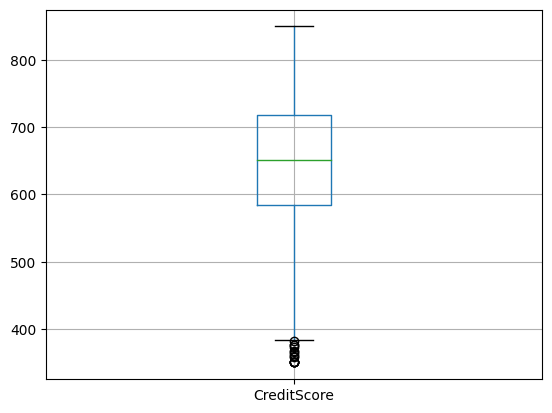

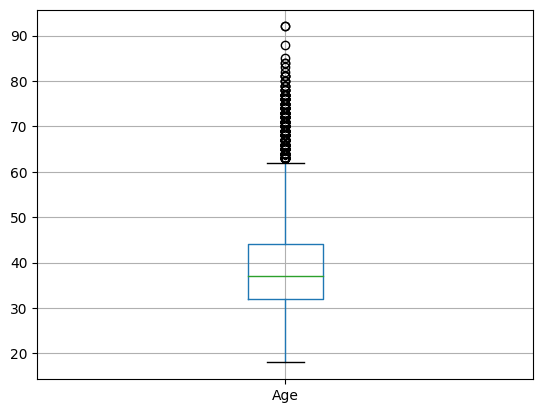

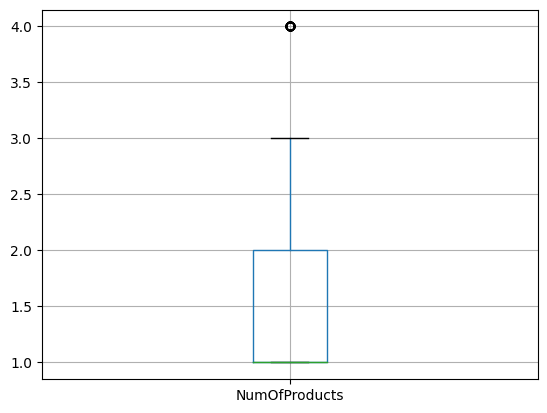

In [10]:
for param in ['CreditScore', 'Age', 'NumOfProducts']:
    data_anonym.boxplot(column=param)
    plt.show()

Есть небольшое количество пользователей с кредитным рейтингом ниже 400, возрастом старше 62 лет и использующих больше 3 продуктов банка.

### Распределение клиентов по разным параметрам.

Рассмотрим, как распределяются значения из таблицы в зависимости от того, является ли клиент текущим(далее на графиках обозначим как 0) или ушедшим(далее на графиках обозначим как 1).

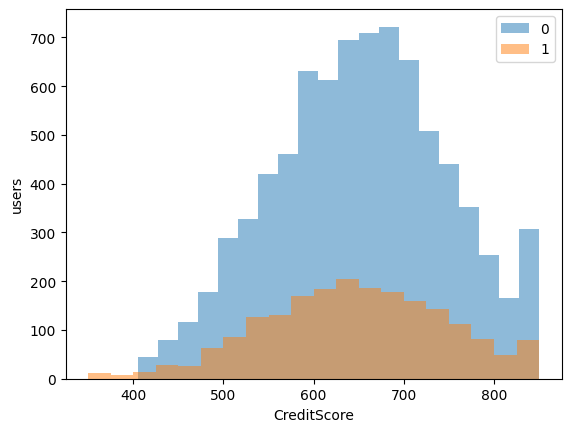

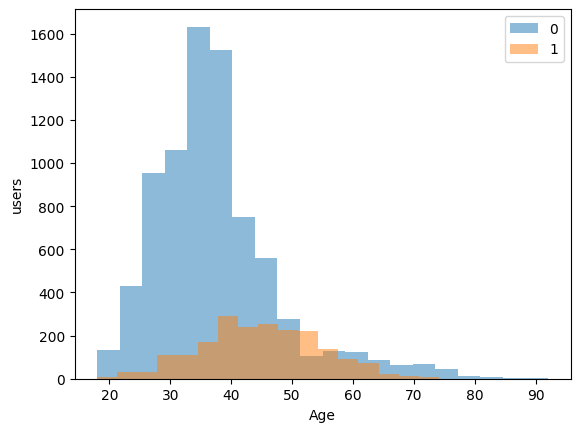

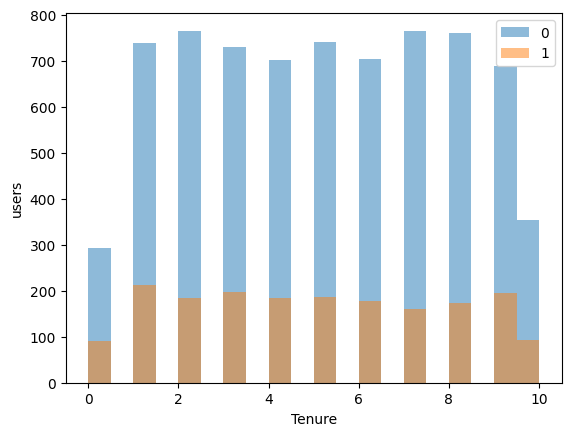

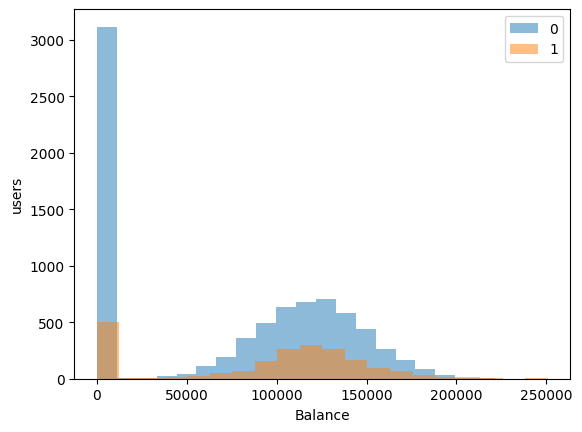

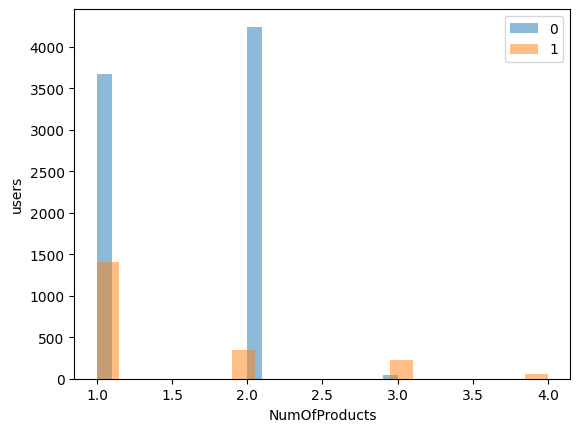

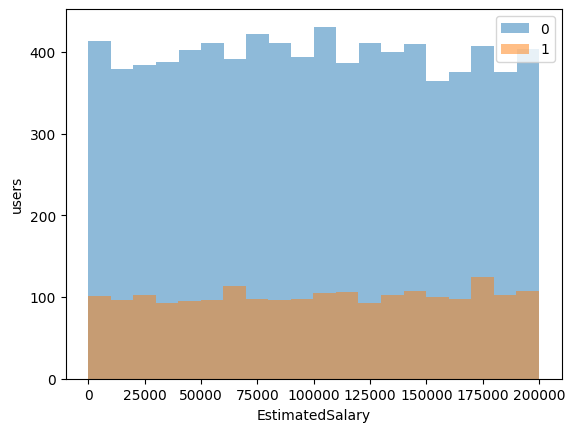

In [11]:
for param in ['CreditScore','Age', 'Tenure',
              'Balance', 'NumOfProducts', 'EstimatedSalary']:
    data_anonym.groupby('Exited')[param]\
               .plot(kind='hist', bins=20, alpha=0.5)
    
    plt.legend(['0', '1'])
    plt.xlabel(param)
    plt.ylabel('users')
    plt.show()

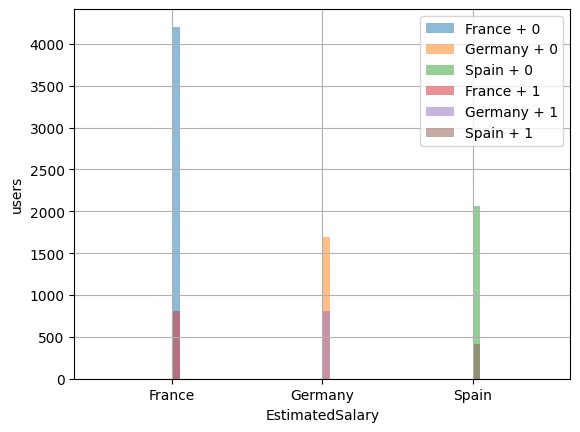

In [12]:
data_anonym[data_anonym['Exited'] == 0] \
    .groupby('Geography')['Geography'] \
    .hist(bins=20, alpha=0.5)

data_anonym[data_anonym['Exited'] == 1] \
    .groupby('Geography')['Geography'] \
    .hist(bins=20, alpha=0.5)

plt.legend(['France + 0','Germany + 0',
            'Spain + 0','France + 1',
            'Germany + 1','Spain + 1'])
plt.xlabel(param)
plt.ylabel('users')
plt.show()

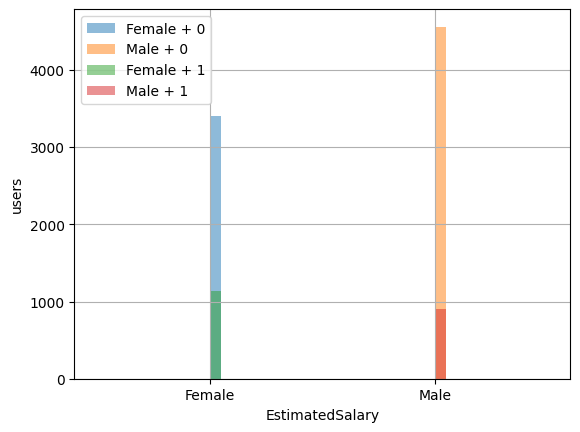

In [13]:
data_anonym[data_anonym['Exited'] == 0] \
    .groupby('Gender')['Gender'] \
    .hist(bins=20, alpha=0.5)

data_anonym[data_anonym['Exited'] == 1] \
    .groupby('Gender')['Gender'] \
    .hist(bins=20, alpha=0.5)

plt.legend(['Female + 0','Male + 0',
            'Female + 1','Male + 1'])
plt.xlabel(param)
plt.ylabel('users')
plt.show()

Судя по графикам, явных перекосов ушедших клиентов в какой-то одной категории нет. Однако, можно заметить, что в процентном соотношении ушедших клиентов среди использовавших 3 или 4 продукта банка, клиентов на территории Германии, а также женщин больше, чем в остальных вариациях соотвтсвующего критерия.

### Преобразование данных.

Произведем преобразование категориальных значений из столбцов страна проживания и пол в численные. 

In [14]:
data_anonym = pd.get_dummies(data_anonym, drop_first=True)

In [15]:
data_anonym.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Так как пропуски мешают работе моделей, заменим пропуски на медианное зназение.

In [16]:
data_anonym['Tenure'] = data_anonym['Tenure'].fillna(data_anonym['Tenure']
                                             .median())

Теперь произведем масштабирование признаков из столбцов кредитный рейтинг, возраст, баланс счета и предполагаемая зарплата.

Так как у нас нет отдельной валидационной выборки и спрятанной тестовой выборки, разделим общие данные на 3 части в следующих пропорциях: 60% - обучающие данные, 20% - валидацтонная выборка и 20% - тестовая выборка. Это стандартное разделение на выборки 3:1:1.

In [17]:
#выделим целевой признак
features = data_anonym.drop('Exited', axis=1)
target = data_anonym['Exited']

In [18]:
# выделим обучающие данные
features_train, features_valid_and_test, \
target_train, target_valid_and_test = train_test_split(features,
                                                       target, 
                                                       test_size=0.4,
                                                       random_state=12345,
                                                       stratify = target)

In [19]:
# разделим оставшиеся данные на вавлидационные и тестовые
features_valid, features_test, \
 target_valid, target_test = train_test_split(features_valid_and_test,
                                              target_valid_and_test,
                                              test_size=0.5,
                                              random_state=12345,
                                              stratify=target_valid_and_test)

In [20]:
# перечень столбцов для масштабирования
numeric = ['CreditScore', 
           'Age', 
           'Tenure', 
           'Balance', 
           'NumOfProducts', 
           'EstimatedSalary']

In [21]:
# модель для масштабирования
scaler = StandardScaler()
# обучение модели
scaler.fit(features_train[numeric]) 
# масштабированиие данных 
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric])

Проверим, как выполнилось преобразование.

In [22]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,-1.040434,0.953312,0.360600,0.774657,-0.914708,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,-0.002786,1.910540,-0.914708,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,1.087371,0.481608,0.820981,0,1,1.422836,0,0,1
660,-0.184996,0.190726,-0.002786,0.088439,-0.914708,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,-1.456328,0.879129,-0.914708,1,0,0.113236,0,0,0


Теперь можно перейти к рассмотрению моделей для прогнозирования.

## Исследование задачи

Рассмотрим несколько моделей: логистическую регрессию, решающее дерево и случайный лес решающих деревьев.
Для начала посмотрим, на сколько эфективными окажутся модели на текущих данных. Так как нас интересует удержание клиентов, для оценки модели воспользуемся параметром F-меры(среднего гармонического).

In [23]:
# функция расчета метрик качества
def quality_metrics(targ, pred):
  recall = recall_score(targ, pred)
  f1 = f1_score(targ, pred)
  roc_auc = roc_auc_score(targ, pred)
  print('Recall =', '%.3f' %f1)
  print('F1 =', '%.3f' %recall)
  print('AUC-ROC =', '%.3f' %roc_auc)

### Логистическая регрессия

In [24]:
%%time
#создание модели
model_lr = LogisticRegression(random_state=12345, 
                              solver='lbfgs', 
                              max_iter=1000) 
#обучение модели 
model_lr.fit(features_train, target_train)

#проверка работы модели на валидационной выборке
predictions_valid_lr = model_lr.predict(features_valid)

CPU times: user 20 ms, sys: 8.87 ms, total: 28.9 ms
Wall time: 20.6 ms


Посмотрим показатели качества.

In [25]:
#оценка работы модели
quality_metrics(target_valid, predictions_valid_lr)

Recall = 0.305
F1 = 0.203
AUC-ROC = 0.585


Результат среднего гармонического модели логистической регрессии на валидационной выборке - 0,33, а площадь под ROC-кривой 0,59. Это низкие показатели. Посмотрим, удасться ли их улучшить в других моделях.

### Решающее дерево
Найдём наилучшую модель решающего дерева.


In [26]:
%%time
best_model = None
best_result = 0
best_depth = 0

for depth in range(1, 10): 
    #создание модели
    model_dtc = DecisionTreeClassifier(random_state=12345,
                                       max_depth=depth)
    #обучение модели
    model_dtc.fit(features_train, target_train)
    #проверка работы модели на валидационной выборке
    predictions_valid_dtc = model_dtc.predict(features_valid)
    #оценка работы модели
    result_dtc = f1_score(target_valid, predictions_valid_dtc)
    if result_dtc > best_result:
        best_model = model_dtc # сохраним наилучшую модель
        best_result = result_dtc
        best_depth = depth

CPU times: user 178 ms, sys: 62.1 ms, total: 241 ms
Wall time: 177 ms


In [27]:
# максимальная глубина лучшей модели
best_depth

7

In [28]:
#лучшая модель решающего дерева 
model_dtc = best_model

In [29]:
#проверка работы модели на валидационной выборке
predictions_valid_dtc = model_dtc.predict(features_valid)

Посмотрим показатели качества.

In [30]:
#оценка работы модели
quality_metrics(target_valid, predictions_valid_dtc)

Recall = 0.592
F1 = 0.502
AUC-ROC = 0.726


Среднее гармоническое решающего дерева 0,57, а AUC-ROC 0,71. Уже гораздо лучше, но всё ещё недостаточно.

### Случайный лес решающих деревьев
Найдём наилучшую модель для случайного леса решающих деревьев.


In [31]:
%%time
best_model = None
best_result = 0
best_n_est = 0
best_depth = 0

for est in range(50, 70):
    for depth in range(10, 20):
        #создание модели
        model_rfc = RandomForestClassifier(random_state=12345, 
                                           n_estimators=est, 
                                           max_depth=depth)
        #обучение модели
        model_rfc.fit(features_train, target_train)
        #проверка работы модели на валидационной выборке
        predictions_valid_rfc = model_rfc.predict(features_valid)
        #оценка работы модели
        result_rfc = f1_score(target_valid, predictions_valid_rfc)
        if result_rfc > best_result:
            best_model = model_rfc 
            best_result = result_rfc
            best_n_est = est
            best_depth = depth

CPU times: user 1min 30s, sys: 255 ms, total: 1min 31s
Wall time: 1min 36s


In [32]:
# количество деревьев лучшей модели
best_n_est

60

In [33]:
# максимальная глубина лучшей модели
best_depth

15

In [34]:
#лучшая модель решающего дерева 
model_rfc = best_model

In [35]:
#проверка работы модели на валидационной выборке
predictions_valid_rfc = model_rfc.predict(features_valid)

In [36]:
#прогноз вероятности на валидационной выборке
probablities_valid_rfc = model_rfc.predict_proba(features_valid)[:, 1]

Посмотрим показатели качества.

In [37]:
#оценка работы модели
quality_metrics(target_valid, predictions_valid_rfc)

Recall = 0.628
F1 = 0.522
AUC-ROC = 0.743


Среднее гармоническое случайного леса решающих деревьев 0,628, а AUC-ROC 0,864. 

На полученных данных можно заметить, что с ростом среднего гармонического, растет и AUC-ROC. Лучшие показатели на несбалансированных данных показала модель случайного леса. Попробуем ещё улучшить параметры, для этого необходимо сбалансировать данные в обучающих выборках.

## Борьба с дисбалансом

Для борьбы с дисбалансом данных используют несколько методов: учет веса класса, увеличение и уменьшение выборки. Рассмотрим каждый из методов на модели случайного леса решающих деревьев.

### Вес класса

In [38]:
%%time
best_model = None
best_result = 0
best_n_est = 0
best_depth = 0

for est in range(10, 131, 5): 
    for depth in range(5, 15):
        #создание модели
        model_rfc_balance = RandomForestClassifier(random_state=12345, 
                                                   n_estimators=est,
                                                   max_depth=depth,
                                                   class_weight='balanced')
        #обучение модели
        model_rfc_balance.fit(features_train, target_train)
        #проверка работы модели на валидационной выборке
        predictions_valid_rfc = model_rfc_balance.predict(features_valid)
        #оценка работы модели
        result_rfc_balance = f1_score(target_valid, predictions_valid_rfc)
        if result_rfc_balance > best_result:
            best_model = model_rfc_balance # сохраним наилучшую модель
            best_result = result_rfc_balance
            best_n_est = est
            best_depth = depth

CPU times: user 1min 52s, sys: 385 ms, total: 1min 52s
Wall time: 2min 1s


In [39]:
# количество деревьев лучшей модели
best_n_est

65

In [40]:
# максимальная глубина лучшей модели
best_depth

10

In [41]:
#лучшая модель решающего дерева 
model_rfc_balance = best_model

In [42]:
#проверка работы модели на валидационной выборке
predictions_valid_rfc = model_rfc_balance.predict(features_valid)

In [43]:
#прогноз вероятности на валидационной выборке
probablities_valid_rfc = model_rfc_balance\
                        .predict_proba(features_valid)[:, 1]

In [44]:
#оценка работы модели
quality_metrics(target_valid, predictions_valid_rfc)

Recall = 0.658
F1 = 0.669
AUC-ROC = 0.788


У модели, обученной с учётом веса класса, показатели F1 и AUC-ROC выросли с 0,628, и 0,864 до 0,653 и 0,871. Неплохой резуультат, попробуем улучшить их ещё.

### Увеличение выборки

Для этого метода нам необходимо произвести манипуляции с обчающей выборкой. Чтобы получить сбалансированную выборку, добавим в нее недостающее количество строк ушедших клиентов.

In [45]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] \
                                   + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [46]:
# расчитаем замер необходимого увеличения
(target_train.count() - target_train.sum()) / target_train.sum()

3.909983633387889

In [47]:
features_train_upsample, target_train_upsample = \
upsample(features_train, target_train, 4)

In [48]:
%%time
best_model = None
best_result = 0
best_n_est = 0
best_depth = 0

for est in range(30, 45): 
    for depth in range(5, 15):
        #создание модели
        model_rfc_upsampling = RandomForestClassifier(random_state=12345, 
                                                   n_estimators=est,
                                                   max_depth=depth)
        #обучение модели
        model_rfc_upsampling.fit(features_train_upsample,
                                 target_train_upsample)
        #проверка работы модели на валидационной выборке
        predictions_valid_rfc = model_rfc_upsampling\
                                .predict(features_valid)
        #оценка работы модели
        result_rfc_upsampling = f1_score(target_valid, 
                                         predictions_valid_rfc)
        if result_rfc_upsampling > best_result:
            best_model = model_rfc_upsampling 
            best_result = result_rfc_upsampling
            best_n_est = est
            best_depth = depth

CPU times: user 48.1 s, sys: 138 ms, total: 48.2 s
Wall time: 48.6 s


In [49]:
# количество деревьев лучшей модели
best_n_est

37

In [50]:
# максимальная глубина лучшей модели
best_depth

10

In [51]:
#лучшая модель решающего дерева 
model_rfc_upsampling = best_model

In [52]:
#проверка работы модели на валидационной выборке
predictions_valid_rfc = model_rfc_upsampling.predict(features_valid)

In [53]:
#прогноз вероятности на валидационной выборке
probablities_valid_rfc = model_rfc_upsampling\
                         .predict_proba(features_valid)[:, 1]

In [54]:
#оценка работы модели
quality_metrics(target_valid, predictions_valid_rfc)

Recall = 0.653
F1 = 0.745
AUC-ROC = 0.804


Показатель среднего гармонического получился незначительно выше(5 стотысечных), чам на обучающей выборке с учетом веса класса, а вот показатель AUC-ROC снизился на 0.005 - 0.653 и 0.866. Посмотрим, как изменятся показатели в следующем эксперименте.

### Уменьшение выборки

Для этого метода добавим в нее недостающее количество строк ушедших клиентов.

In [55]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, 
                               random_state=12345)] \
                                + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, 
                             random_state=12345)] \
                             + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [56]:
# расчитаем замер необходимого уменьшения
target_train.mean()

0.20366666666666666

In [57]:
features_train_downsampled, target_train_downsampled = \
downsample(features_train, target_train, 0.2)

In [58]:
%%time
best_model = None
best_result = 0
best_n_est = 0
best_depth = 0

for est in range(10, 25): 
    for depth in range(1, 10):
        #создание модели
        model_rfc_downsampled = RandomForestClassifier(
                                                   random_state=12345, 
                                                   n_estimators=est,
                                                   max_depth=depth
                                                   )
        #обучение модели
        model_rfc_downsampled.fit(features_train_downsampled,
                                  target_train_downsampled)
        #проверка работы модели на валидационной выборке
        predictions_valid_rfc = model_rfc_downsampled\
                                .predict(features_valid)
        #оценка работы модели
        result_rfc_downsampled = f1_score(target_valid, 
                                          predictions_valid_rfc)
        if result_rfc_downsampled > best_result:
            best_model = model_rfc_downsampled 
            best_result = result_rfc_downsampled
            best_n_est = est
            best_depth = depth

CPU times: user 6.46 s, sys: 29.9 ms, total: 6.49 s
Wall time: 6.53 s


In [59]:
# количество деревьев лучшей модели
best_n_est

22

In [60]:
# максимальная глубина лучшей модели
best_depth

6

In [61]:
#лучшая модель решающего дерева 
model_rfc_downsampled = best_model

In [62]:
#проверка работы модели на валидационной выборке
predictions_valid_rfc = model_rfc_downsampled.predict(features_valid)

In [63]:
#прогноз вероятности на валидационной выборке
probablities_valid_rfc = model_rfc_downsampled\
                         .predict_proba(features_valid)[:, 1]

In [64]:
#оценка работы модели
quality_metrics(target_valid, predictions_valid_rfc)

Recall = 0.606
F1 = 0.855
AUC-ROC = 0.804


На обучающей выборке с уменьшением,  оказались самые низкие показатели F1 и AUC-ROC - 0.606 и 0.868.

Самые оптимальные показатели оказались у модели, обученной на увеличенной выборке - F-мера = 0.653 и площадью под roc-кривой  0.866.

## Тестирование модели
Проверим модель, обученную на увеличенной выборке, на тестовой выборке.

In [65]:
#проверка работы модели на тестовой выборке
predictions_test_rfc = model_rfc_upsampling.predict(features_test)

In [66]:
#прогноз вероятности на валидационной выборке
probablities_valid_rfc = model_rfc_upsampling\
                         .predict_proba(features_test)[:, 1]

In [67]:
#оценка работы модели 
quality_metrics(target_test, predictions_test_rfc)

Recall = 0.603
F1 = 0.681
AUC-ROC = 0.767


На тестовой выборке наша модель выдаёт показатели среднего гармонического 0.603 и AUC-ROC 0.851. Показатель снизилсся по сравнению с валидационной выборкой. Показатели модели оказались выше, чем у случайной модели, а значит наша модель рабочая.

##Вывод

На основании запроса от «Бета-Банка» было произведено исследование оттока клиентов. Задача данного исследования - посторить модель для предсказания ухода клиента на основании предоставленных данных о клиентах.

В ходе исследования также было проанализировано влияние баланса данных на качество предсказания моделей.

В роли метрик качества моделей были выбраны:
- recall(полнота - количество истинно положительных ответов среди всех положительных предсказаний)
- f1(среднее гармоническое полноты и точности предсказаний)
- roc_auc(площадь под кривой ошибок - довя верно определенных значений)

При обучении моделей на несбалансированных данных были получены следующие показатели метрик качества:

|Модель|recall| F1 |AUC-ROC|
|----- | ---- | -- | ----- |
|Логистическая регрессия| 0.203 | 0.305 | 0.585 |
|Решающее дерево| 0.502 | 0.592 | 0.726 |
|Случайный лес решающих деревьев| 0.522 | 0.628 | 0.864 |

На полученных данных можно заметить, что с ростом среднего гармонического, растет и AUC-ROC. Лучшие показатели на несбалансированных данных показала модель случайного леса. 

Для улучшения показателей случайного леса решающих деревьев были рассмотрены 3 способа баланса классов(учет веса класса, увеличение и уменьшение выборки).

|Тип баланса|recall| F1 |AUC-ROC|
|----- | ---- | -- | ----- |
|Учет веса класса| 0.669 | 0.658 | 0.866 |
|Увеличение выборки| 0.745 | 0.653 | 0.726 |
|Уменьшение выборки| 0.855 | 0.606 | 0.868 |

Из полученных данных видно, что оптимальные значения F1 и AUC-ROC получены при увеличении выборки.

При проверке модели с лучшими показателями на тестовой выборке значения параметров оказались:
- recall = 0.681
- F1 = 0.603
- AUC-ROC = 0.851

На тестовых данных получены хорошие показатели точности модели, поэтому наша модель готова к дальнейшему использованию.

